## start here

### All import functions here

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### importing the data and verifying it: 

In [15]:
pd.pandas.set_option('display.max_columns', None)
data = pd.read_csv('housing.csv')
print(data.shape)
data.describe()


(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### the top 5 datas points

In [16]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


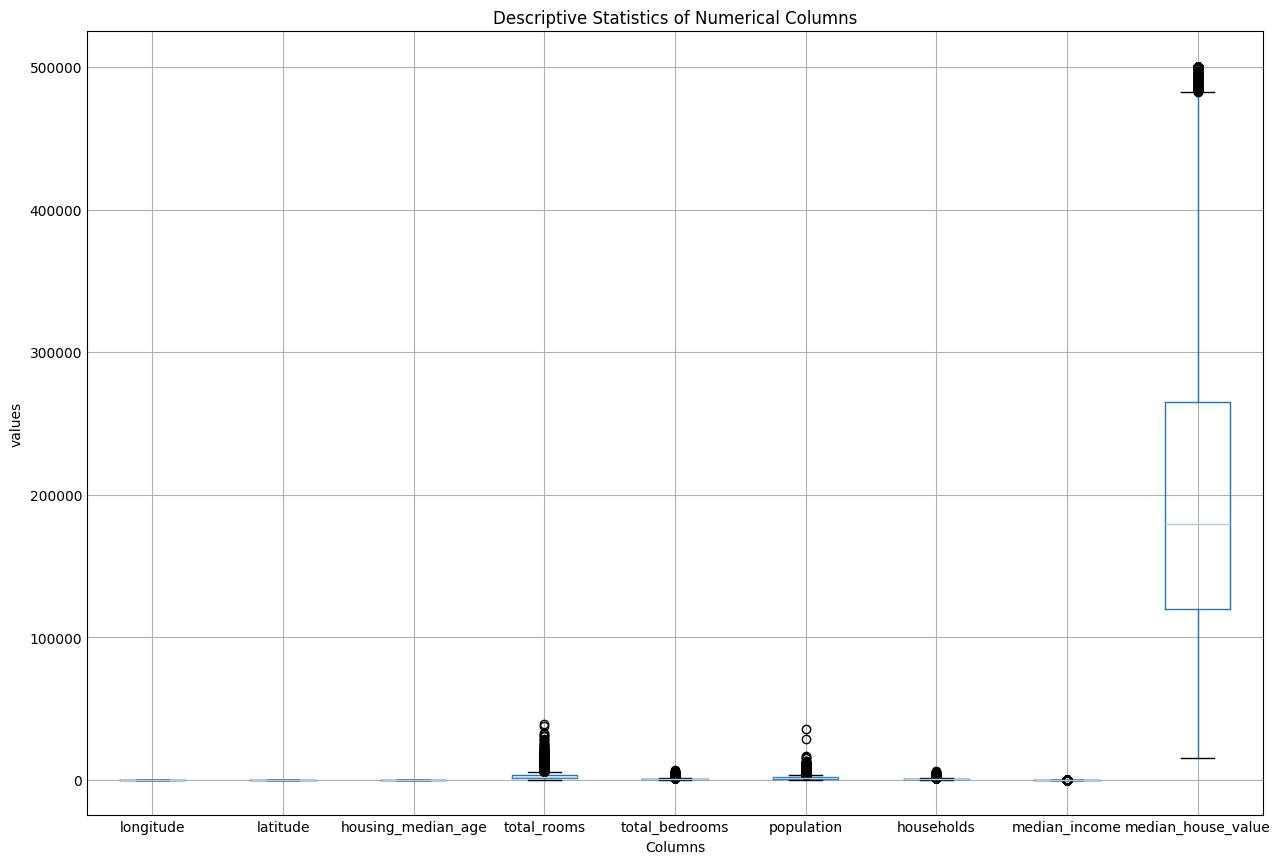

In [17]:
# Select the numerical columns for visualization
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Create a boxplot for each numerical column
data[numerical_columns].boxplot(figsize=(12, 8))

# Set the title and labels
plt.title('Descriptive Statistics of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('values')

# Show the plot
plt.show()

### finding the missing values

In [18]:
missing_data = data.isnull().sum()
print(missing_data)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [19]:

na_feat = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in na_feat:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
    print(len(data[feature]) - data[feature].count(), ': the number of missing values')

missing_data = data.isnull().sum()
print(missing_data)


total_bedrooms 0.01  % missing values
207 : the number of missing values
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Hence only 'total_bedrooms' had missing values with 0.01 % values being missed

In [20]:
missing_rows = data[data['total_bedrooms'].isnull()]
list = missing_rows.index
print(list)


Index([  290,   341,   538,   563,   696,   738,  1097,  1350,  1456,  1493,
       ...
       19932, 19959, 20046, 20069, 20125, 20267, 20268, 20372, 20460, 20484],
      dtype='int64', length=207)


 ### the above cell shows all the rows where the values are missing, Now we fill NA with median


In [21]:
median_value = data['total_bedrooms'].median()
print(median_value)

data_new = data.copy()
'''creating a new column with missing values filled with median value to compare''' 
data_new['total_bedrooms'] = data_new['total_bedrooms'].fillna(median_value)



435.0


In [22]:
def plotter(data, column):
    mean_value = data[column].mean()
    median_value = data[column].median()
    mode_value = data[column].mode()[0]

    plt.figure(figsize=(12, 6))
    plt.hist(data[column], bins=30, color='blue', alpha=0.7)

    plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
    plt.axvline(median_value, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
    plt.axvline(mode_value, color='y', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')
    
    plt.title(f'Distribution of {column} of ')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


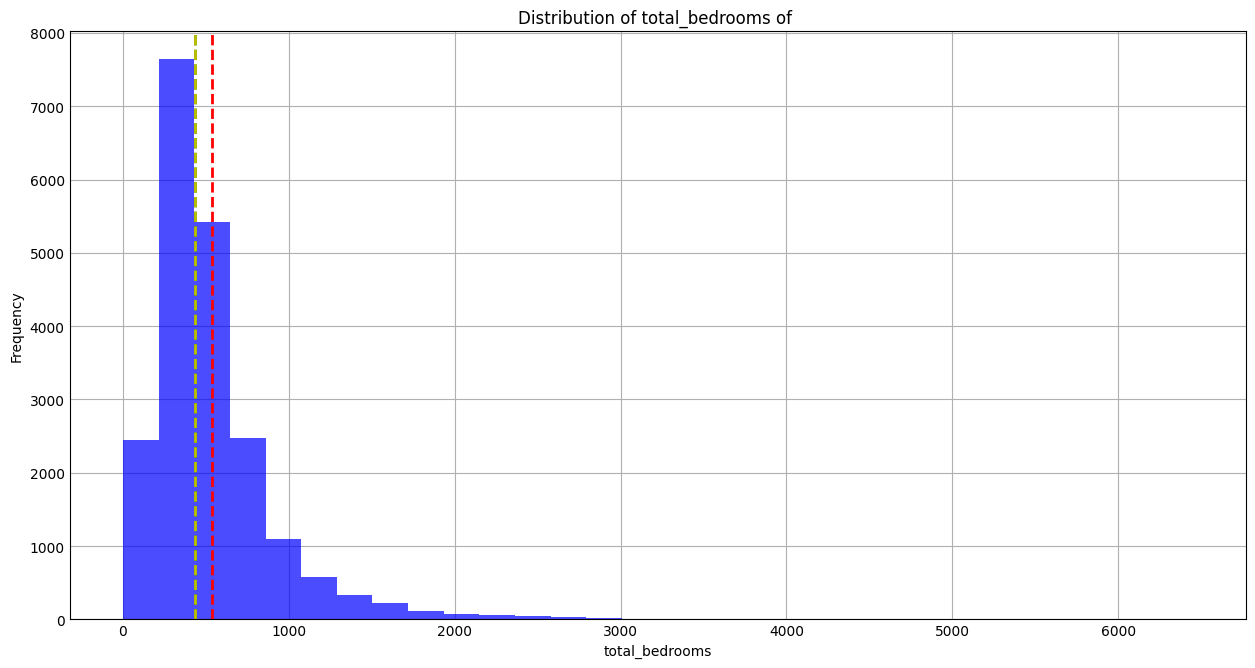

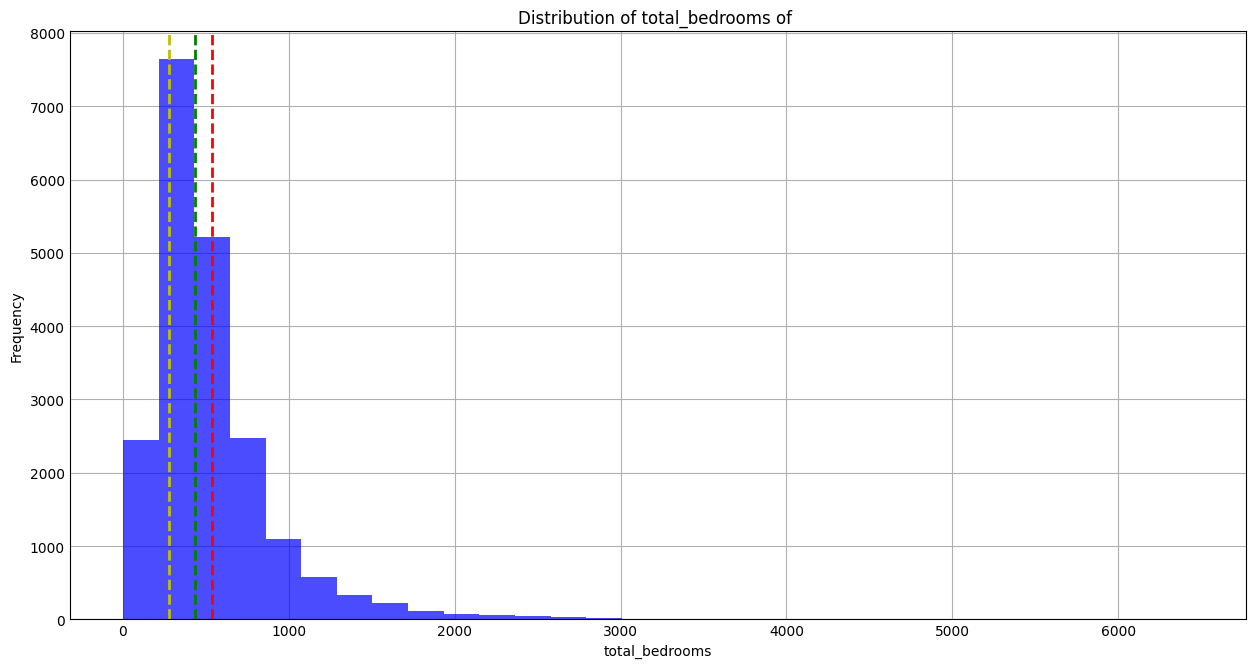

In [23]:
plotter(data_new, 'total_bedrooms')
plotter(data, 'total_bedrooms')

### duplicate removal

In [24]:
data_new = data_new.drop_duplicates()
print(data_new.shape)
print(data.shape)

(20640, 10)
(20640, 10)


### creating map of the longtitude and latitude

In [25]:
def scatter_plot(data, x, y):
    plt.style.use('_mpl-gallery')

    sizes = data['population'] / 100
    color = data['median_house_value']

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(data[x], data[y], s=sizes, c=color , cmap='viridis', alpha=0.6)
    
    cbar = plt.colorbar(scatter)
    cbar.set_label('Median House Value')

    plt.show()

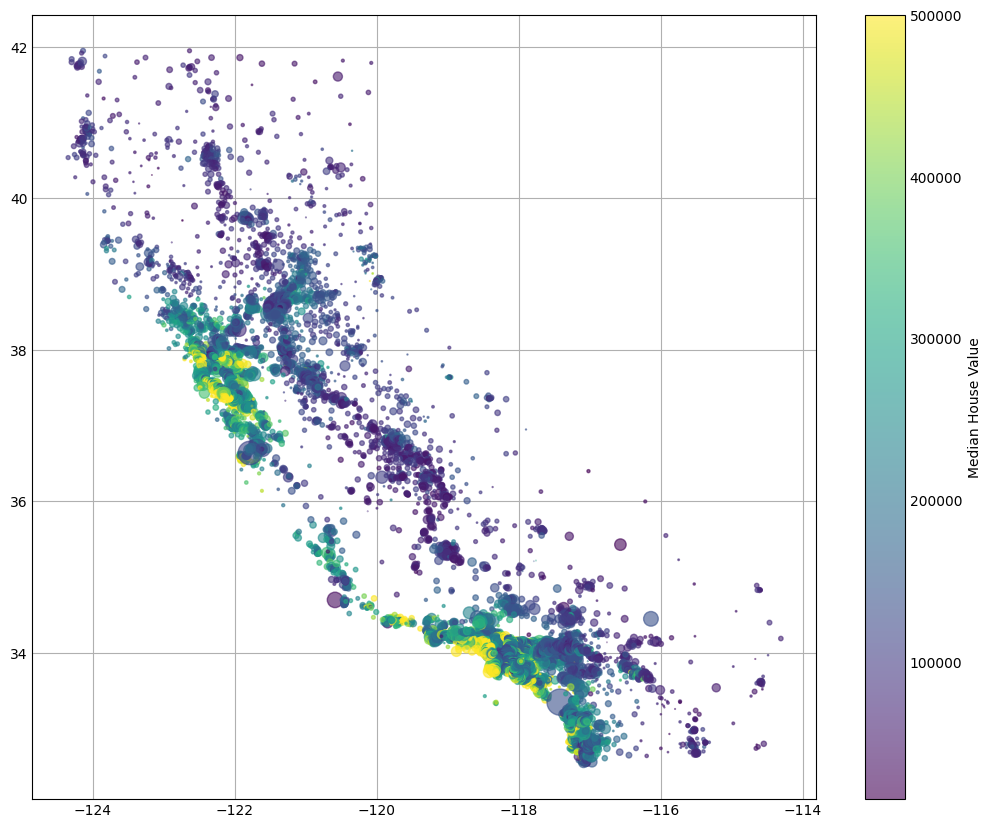

In [26]:
scatter_plot(data_new, 'longitude' , 'latitude')


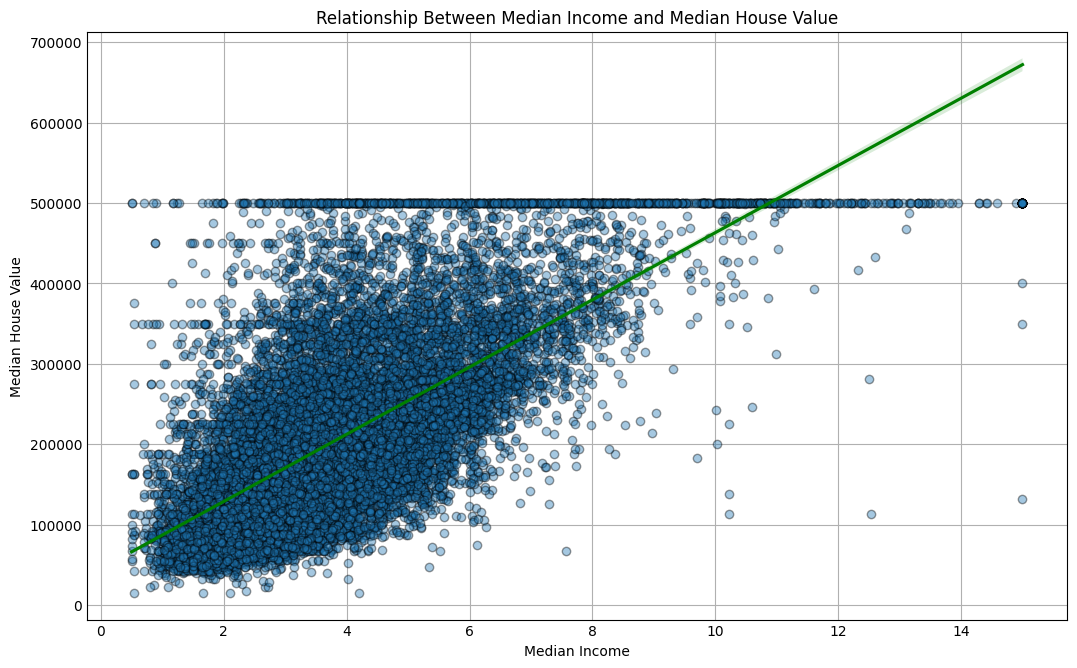

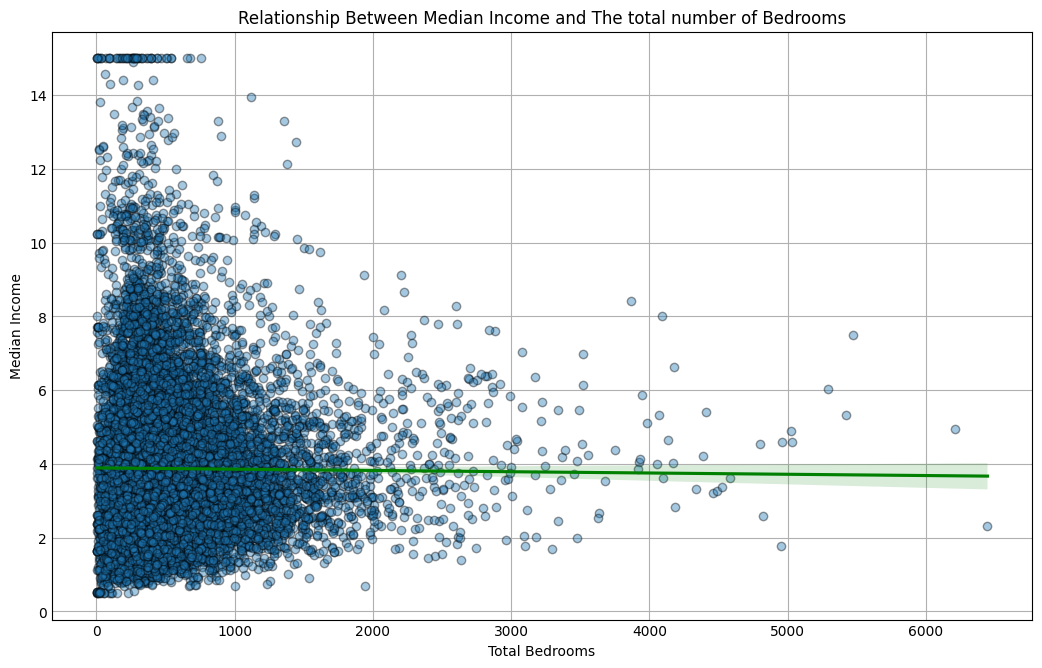

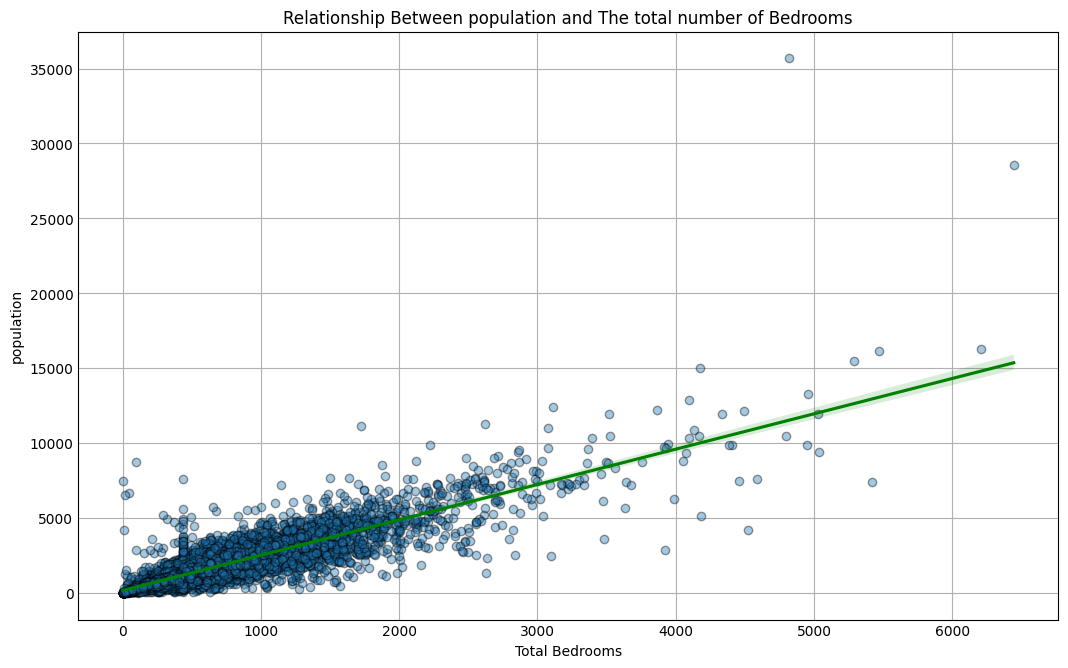

In [27]:
plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='median_income', y='median_house_value', data=data_new, scatter_kws={'alpha':0.4, 'edgecolor':'k'}, line_kws={'color':'green'})

# Label axes
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

# Add a descriptive title
plt.title('Relationship Between Median Income and Median House Value')
plt.show()


plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='total_bedrooms', y='median_income', data=data_new, scatter_kws={'alpha':0.4, 'edgecolor':'k'}, line_kws={'color':'green'})

# Label axes
plt.xlabel('Total Bedrooms')
plt.ylabel('Median Income')

# Add a descriptive title
plt.title('Relationship Between Median Income and The total number of Bedrooms')
plt.show()


plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='total_bedrooms', y='population', data=data_new, scatter_kws={'alpha':0.4, 'edgecolor':'k'}, line_kws={'color':'green'})

# Label axes
plt.xlabel('Total Bedrooms')
plt.ylabel('population')

# Add a descriptive title
plt.title('Relationship Between population and The total number of Bedrooms')
plt.show()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


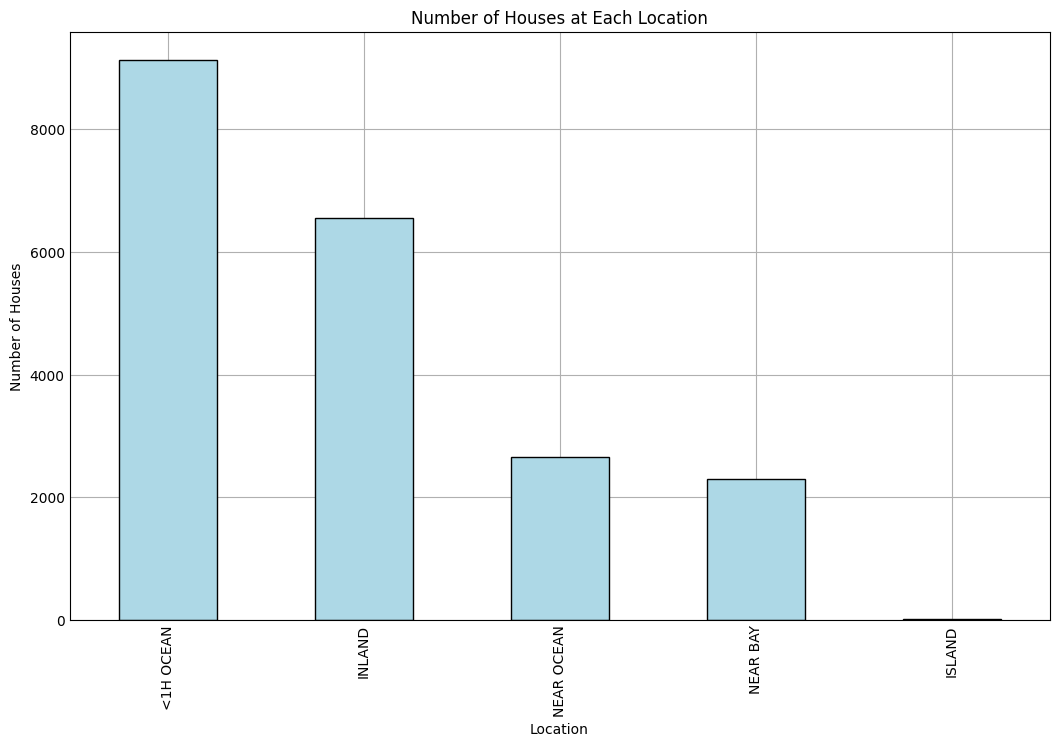

In [28]:
location_counts = data_new['ocean_proximity'].value_counts()
print(location_counts)

# Plot the bar graph
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Label axes
plt.xlabel('Location')
plt.ylabel('Number of Houses')

# Add a descriptive title
plt.title('Number of Houses at Each Location')

# Show the plot
plt.show()


In [29]:
grouped_stats = data_new.groupby('ocean_proximity').describe()

grouped_stats

longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
<1H OCEAN          9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
INLAND             6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
ISLAND                5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
NEAR BAY           2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
NEAR OCEAN         2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude                                     \
                      75%     max    count       mean       std    min    25%   
ocean_proximity                                                                 
<1H OCEAN       -118.0000 -116.62   9136.0  34.560577  1.467127  32.61  33.86   
INLAND          -117.8400 -114.31   6551.0  36.731829  2.116073  32.64  34.18   
ISLAND          -118.3200 -118.32      5.0  33.358000  0.040866  33.33  33.34   
NEAR BAY        -122.1400 -122.01   2290.0  37.801057  0.185434  37.35  37.73   
NEAR OCEAN      -117.1825 -116.97   2658.0  34.738439  2.275386  32.54  32.78   

                                       housing_median_age             \
                   50%      75%    max              count       mean   
ocean_proximity                                                        
<1H OCEAN        34.03  34.2200  41.88             9136.0  29.279225   
INLAND           36.97  38.5500  41.95             6551.0  24.271867   
ISLAND           33.34  33.3500  33.43                5.0  42.400000   
NEAR BAY         37.79  37.9075  38.34             2290.0  37.730131   
NEAR OCEAN       33.79  36.9800  41.95             2658.0  29.347254   

                                                         total_rooms  \
                       std   min   25%   50%   75%   max       count   
ocean_proximity                                                        
<1H OCEAN        11.644453   2.0  20.0  30.0  37.0  52.0      9136.0   
INLAND           12.018020   1.0  15.0  23.0  33.0  52.0      6551.0   
ISLAND           13.164346  27.0  29.0  52.0  52.0  52.0         5.0   
NEAR BAY         13.070385   2.0  29.0  39.0  52.0  52.0      2290.0   
NEAR OCEAN       11.840371   2.0  20.0  29.0  37.0  52.0      2658.0   

                                                                            \
                        mean          std    min      25%     50%      75%   
ocean_proximity                                                              
<1H OCEAN        2628.343586  2160.463696   11.0  1464.00  2108.0  3141.00   
INLAND           2717.742787  2385.831111    2.0  1404.00  2131.0  3216.00   
ISLAND           1574.600000   707.545264  716.0   996.00  1675.0  2127.00   
NEAR BAY         2493.589520  1830.817022    8.0  1431.25  2083.0  3029.75   
NEAR OCEAN       2583.700903  1990.724760   15.0  1505.00  2195.0  3109.00   

                         total_bedrooms                                 \
                     max          count        mean         std    min   
ocean_proximity                                                          
<1H OCEAN        37937.0         9136.0  545.293892  425.677092    5.0   
INLAND           39320.0         6551.0  533.051443  444.332437    2.0   
ISLAND            2359.0            5.0  420.400000  169.320111  214.0   
NEAR BAY         18634.0         2290.0  513.491266  366.351004    1.0   
NEAR OCEAN       30405.0         2658.0  537.446200  374.349629    3.0   

                                               population               \
                    25%    50%     75%     max      count         mean   
ocean_proximity                                                          
<1H OCEAN        304.00  435.0  648.00  6445.0     9136.0  1520.290499   
INLAND           283.00  426.0  633.50  6210.0     6551.0  1391.046252   
ISLAND          

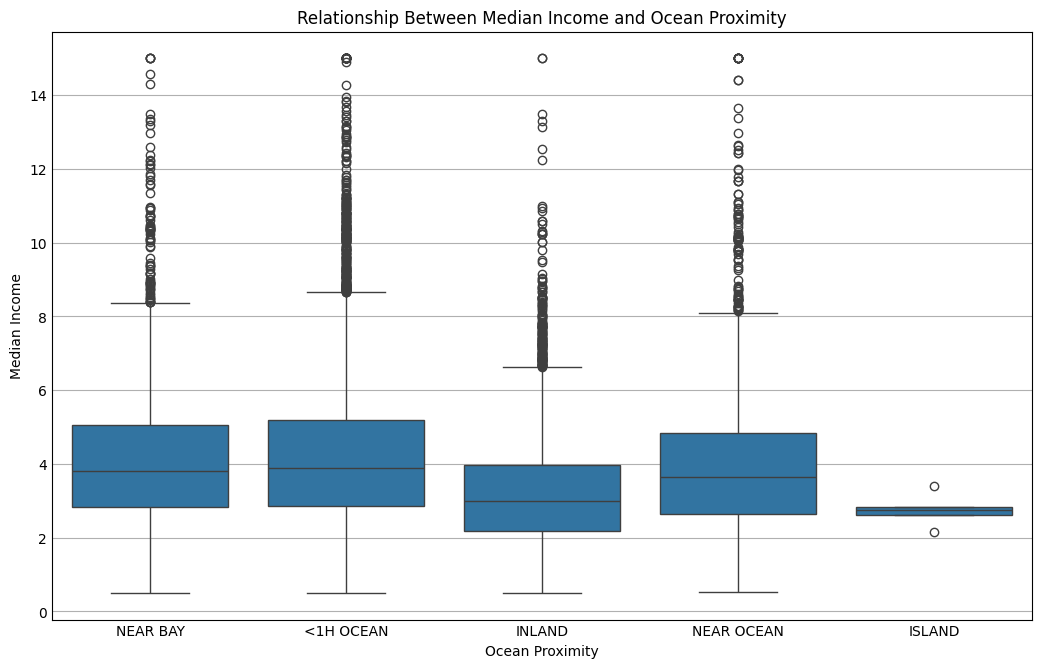

In [30]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=data_new)

plt.title('Relationship Between Median Income and Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')

plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
ocean_proximity_le = LabelEncoder()
data_new['ocean_proximity'] = ocean_proximity_le.fit_transform(data_new['ocean_proximity'])

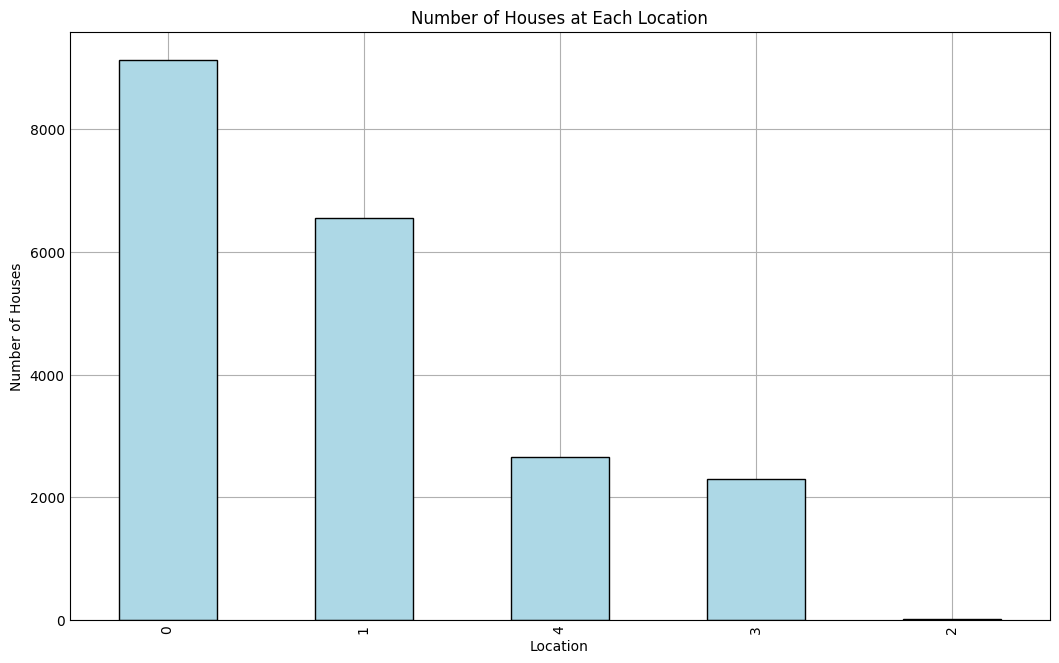

In [32]:
location_counts = data_new['ocean_proximity'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Label axes
plt.xlabel('Location')
plt.ylabel('Number of Houses')

# Add a descriptive title
plt.title('Number of Houses at Each Location')

# Show the plot
plt.show()


In [33]:
grouped_stats = data_new.groupby('ocean_proximity').describe()

grouped_stats




longitude                                                 \
                    count        mean       std     min     25%      50%   
ocean_proximity                                                            
0                  9136.0 -118.847766  1.588888 -124.14 -118.50 -118.275   
1                  6551.0 -119.732990  1.900950 -123.73 -121.35 -120.000   
2                     5.0 -118.354000  0.070569 -118.48 -118.33 -118.320   
3                  2290.0 -122.260694  0.147004 -122.59 -122.41 -122.250   
4                  2658.0 -119.332555  2.327307 -124.35 -122.02 -118.260   

                                  latitude                                     \
                      75%     max    count       mean       std    min    25%   
ocean_proximity                                                                 
0               -118.0000 -116.62   9136.0  34.560577  1.467127  32.61  33.86   
1               -117.8400 -114.31   6551.0  36.731829  2.116073  32.64  34.18   
2               -118.3200 -118.32      5.0  33.358000  0.040866  33.33  33.34   
3               -122.1400 -122.01   2290.0  37.801057  0.185434  37.35  37.73   
4               -117.1825 -116.97   2658.0  34.738439  2.275386  32.54  32.78   

                                       housing_median_age             \
                   50%      75%    max              count       mean   
ocean_proximity                                                        
0                34.03  34.2200  41.88             9136.0  29.279225   
1                36.97  38.5500  41.95             6551.0  24.271867   
2                33.34  33.3500  33.43                5.0  42.400000   
3                37.79  37.9075  38.34             2290.0  37.730131   
4                33.79  36.9800  41.95             2658.0  29.347254   

                                                         total_rooms  \
                       std   min   25%   50%   75%   max       count   
ocean_proximity                                                        
0                11.644453   2.0  20.0  30.0  37.0  52.0      9136.0   
1                12.018020   1.0  15.0  23.0  33.0  52.0      6551.0   
2                13.164346  27.0  29.0  52.0  52.0  52.0         5.0   
3                13.070385   2.0  29.0  39.0  52.0  52.0      2290.0   
4                11.840371   2.0  20.0  29.0  37.0  52.0      2658.0   

                                                                            \
                        mean          std    min      25%     50%      75%   
ocean_proximity                                                              
0                2628.343586  2160.463696   11.0  1464.00  2108.0  3141.00   
1                2717.742787  2385.831111    2.0  1404.00  2131.0  3216.00   
2                1574.600000   707.545264  716.0   996.00  1675.0  2127.00   
3                2493.589520  1830.817022    8.0  1431.25  2083.0  3029.75   
4                2583.700903  1990.724760   15.0  1505.00  2195.0  3109.00   

                         total_bedrooms                                 \
                     max          count        mean         std    min   
ocean_proximity                                                          
0                37937.0         9136.0  545.293892  425.677092    5.0   
1                39320.0         6551.0  533.051443  444.332437    2.0   
2                 2359.0            5.0  420.400000  169.320111  214.0   
3                18634.0         2290.0  513.491266  366.351004    1.0   
4                30405.0         2658.0  537.446200  374.349629    3.0   

                                               population               \
                    25%    50%     75%     max      count         mean   
ocean_proximity                                                          
0                304.00  435.0  648.00  6445.0     9136.0  1520.290499   
1                283.00  426.0  633.50  6210.0     6551.0  1391.046252   
2               

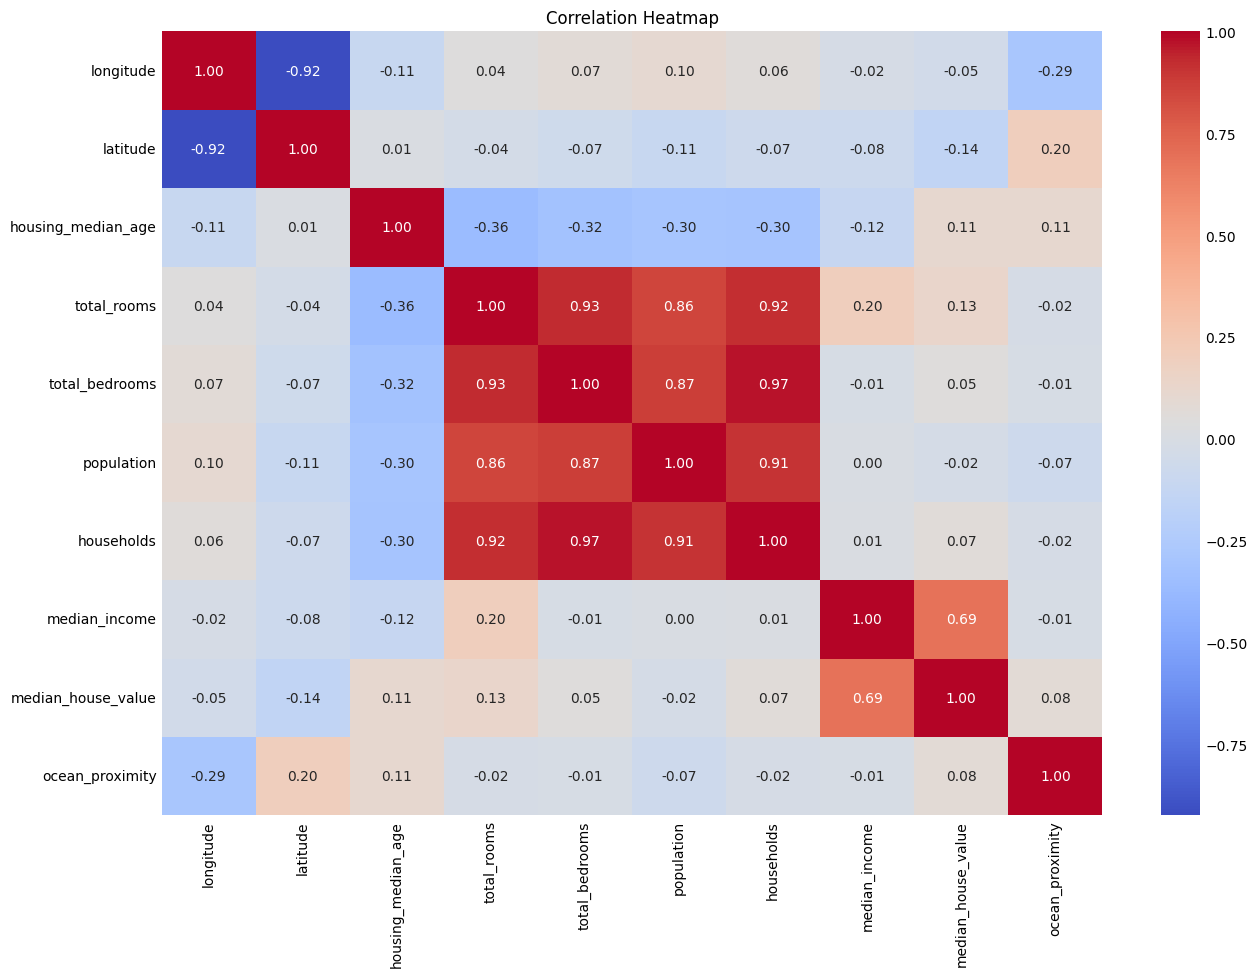

In [34]:
correlation_matrix = data_new.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

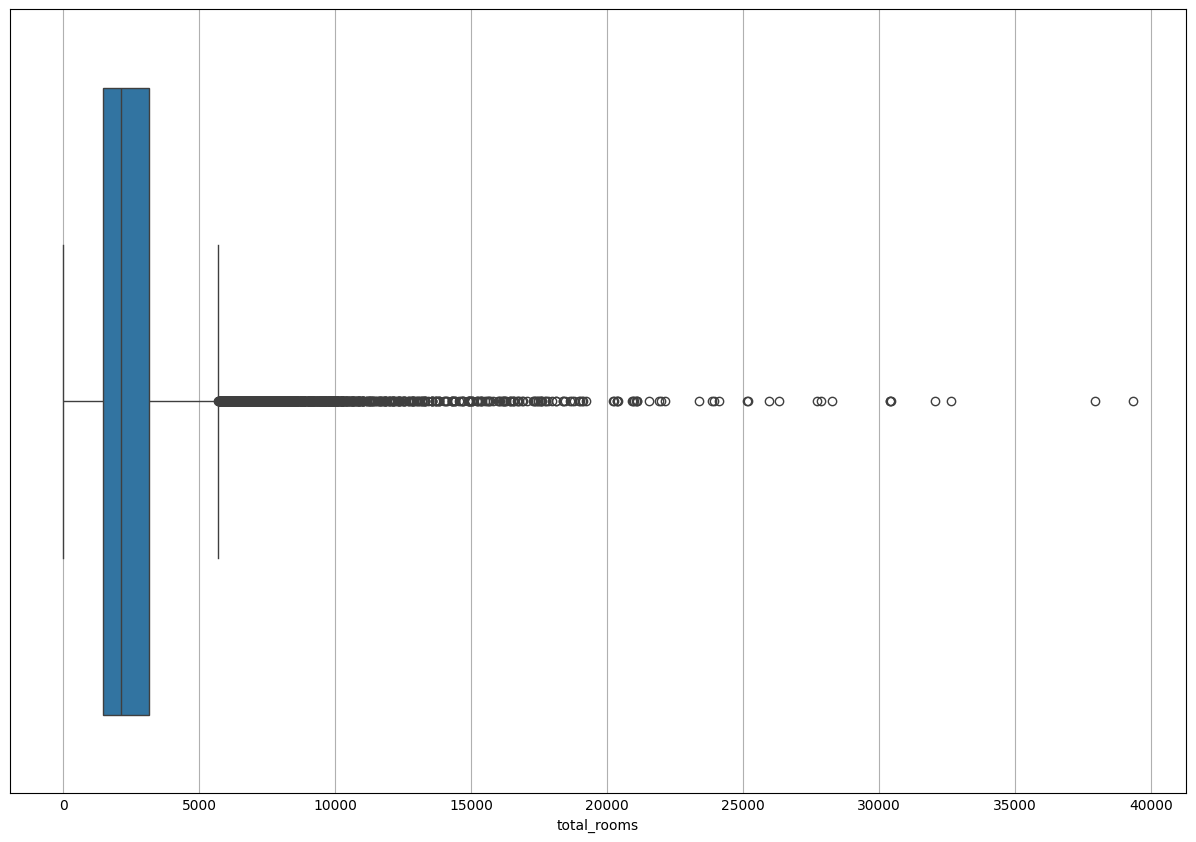

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='total_rooms', data=data_new)
plt.show()

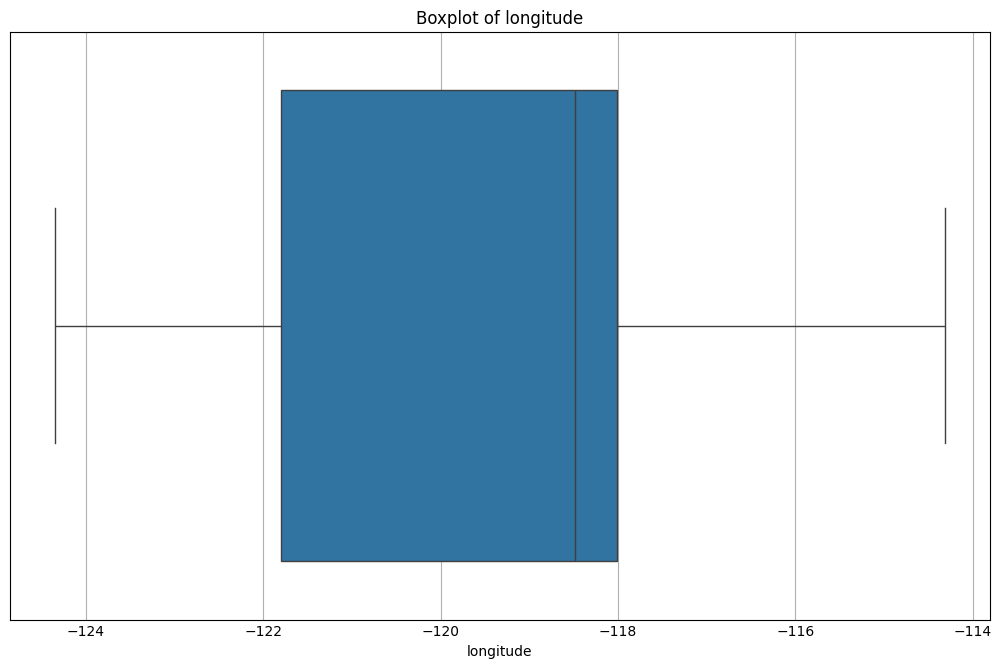

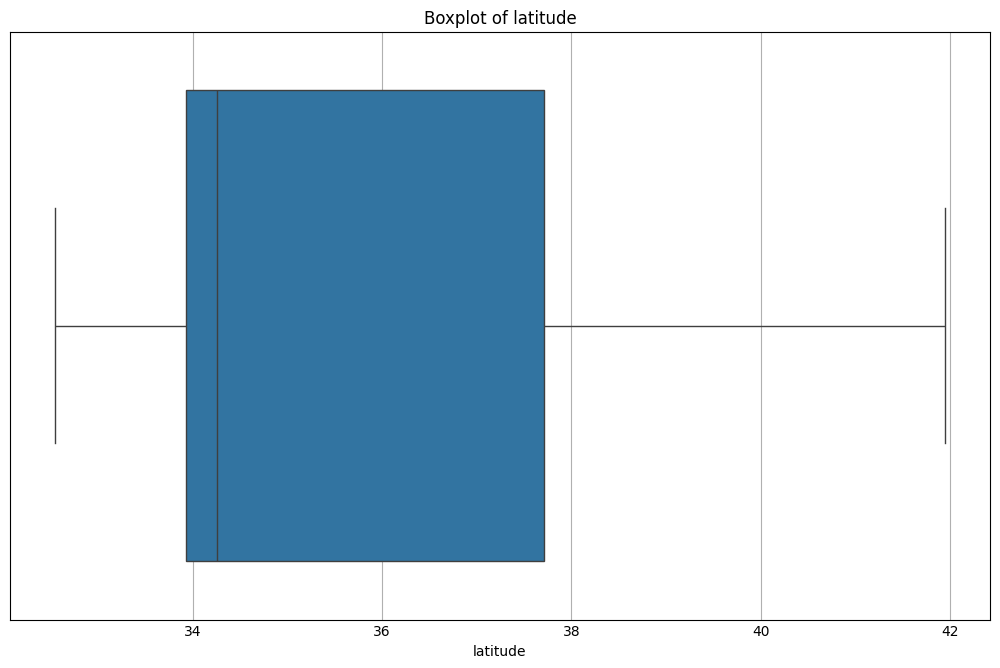

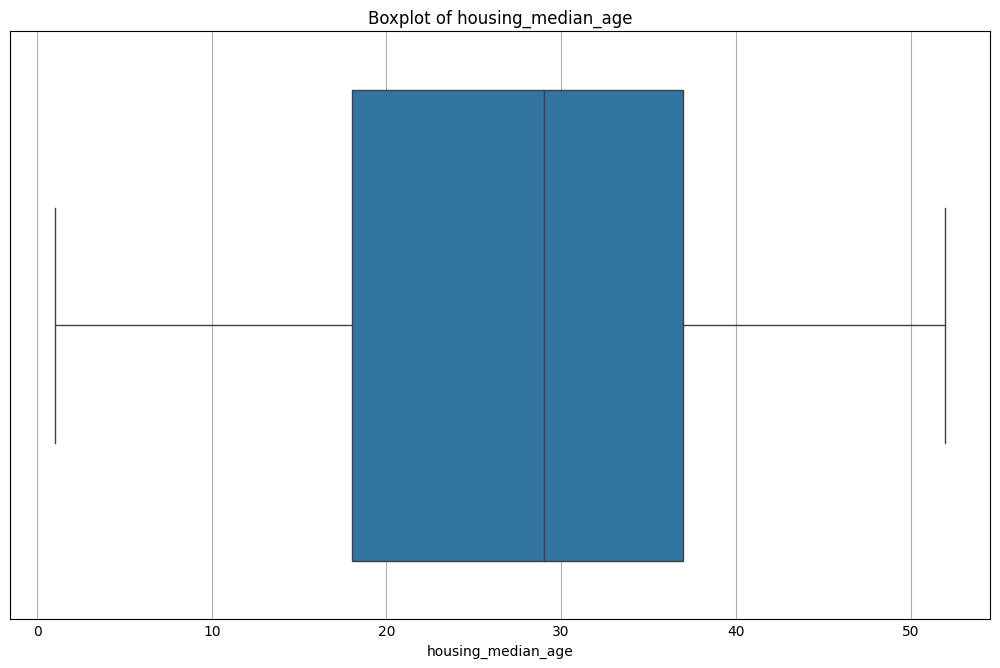

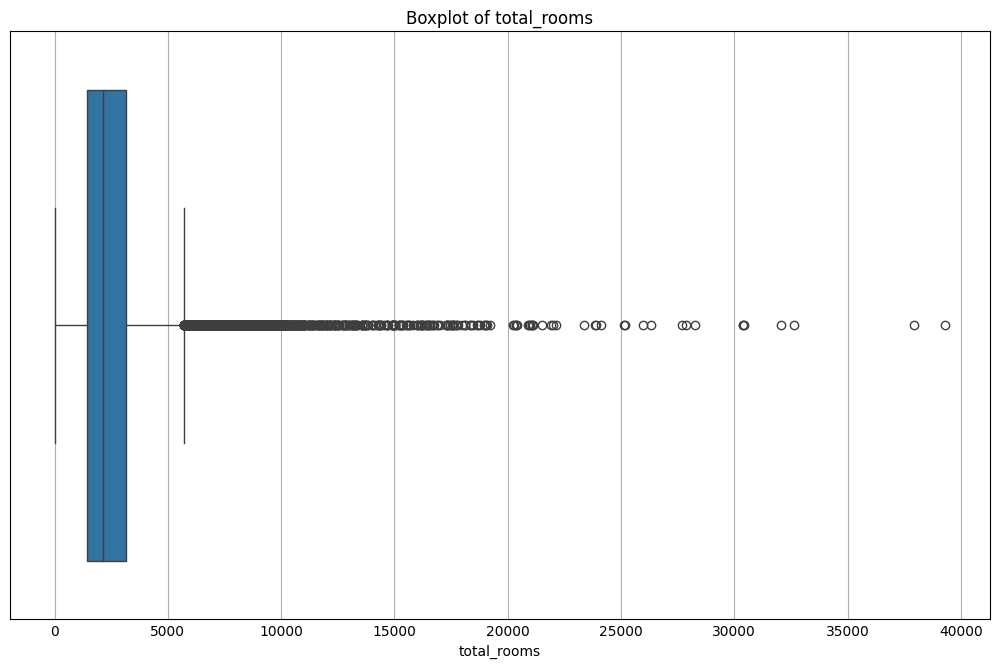

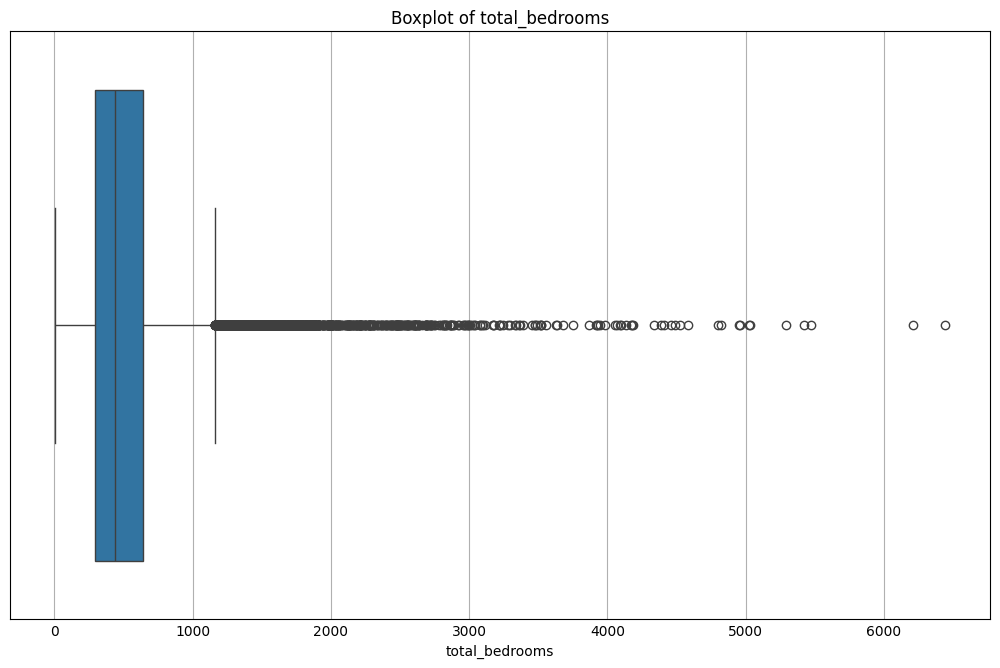

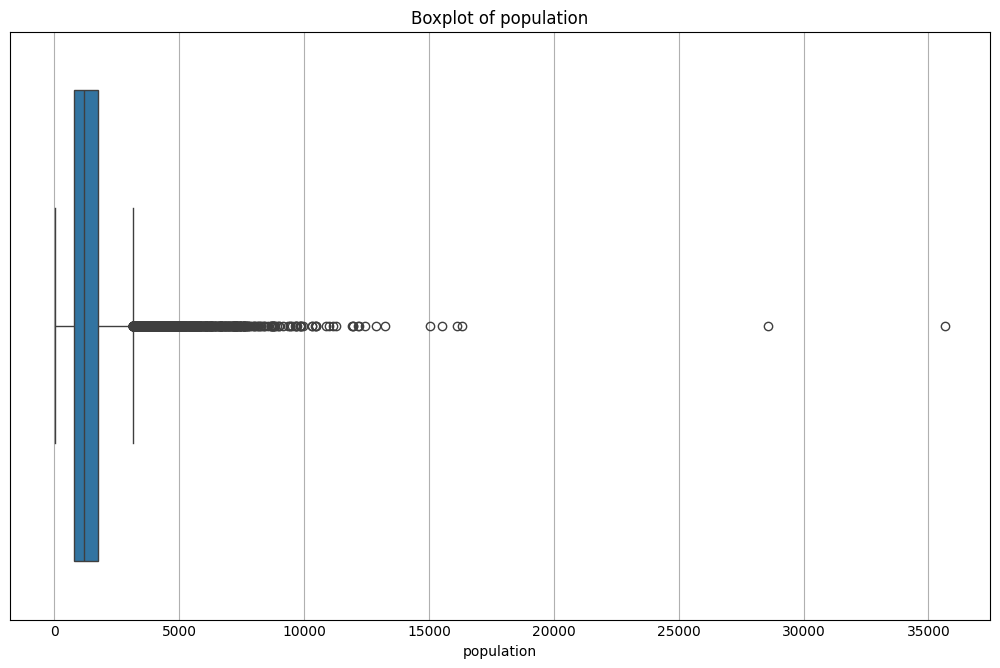

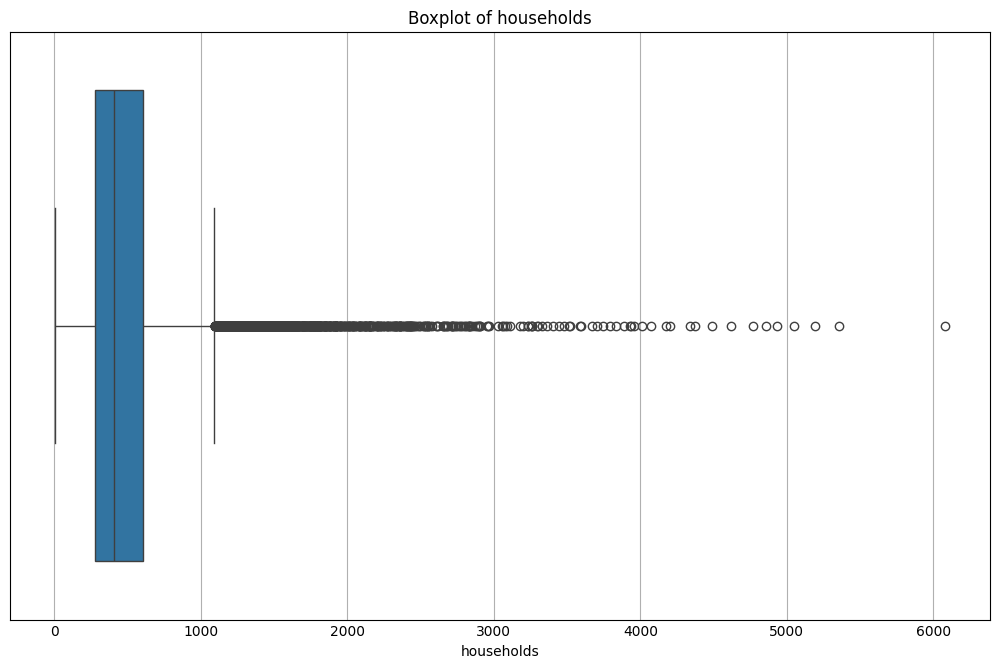

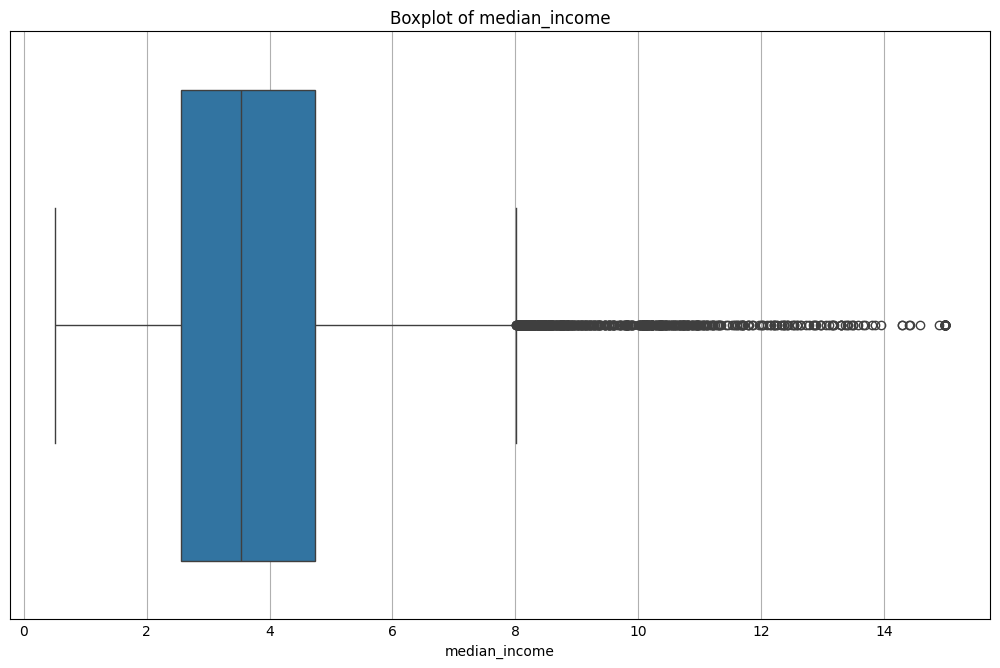

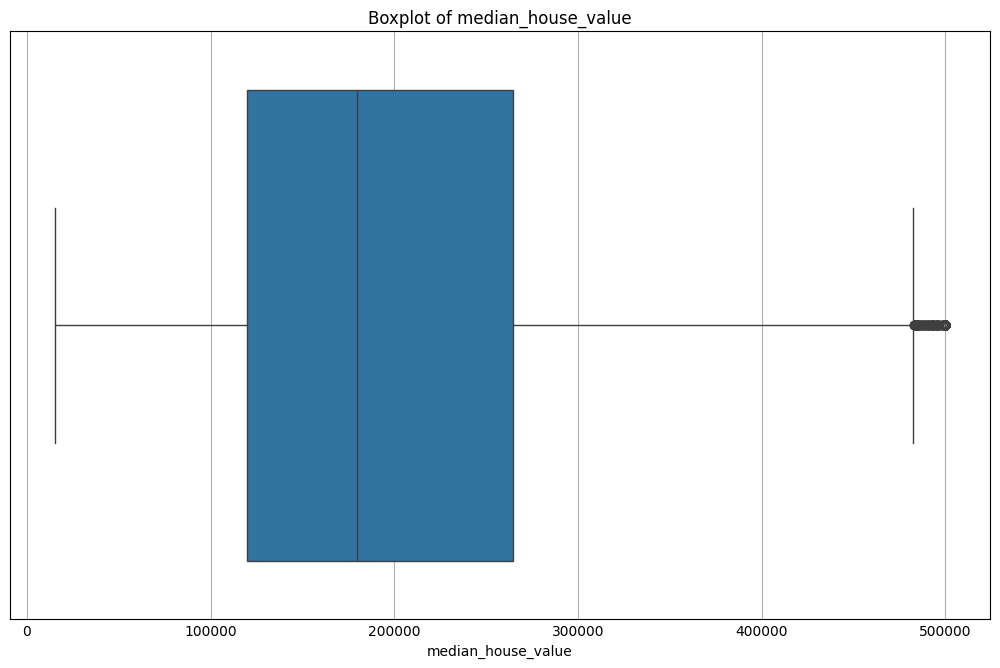

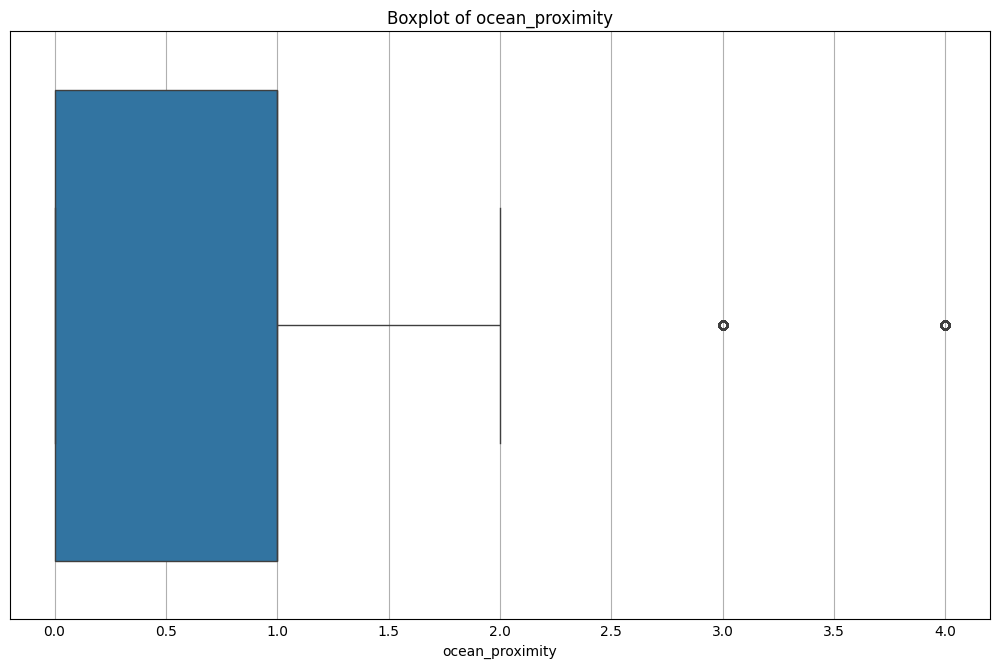

In [36]:
feature_name = data_new.columns


for feature in feature_name:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature,data=data_new)
    plt.title(f'Boxplot of {feature}')
    
    plt.show()

In [37]:
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.7:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.index[j], correlation_matrix.iloc[i, j]))

# Display the strong correlations
for col1, col2, value in strong_correlations:
    print(f"Strong correlation between {col1} and {col2}: {value:.2f}")

Strong correlation between total_bedrooms and total_rooms: 0.93
Strong correlation between population and total_rooms: 0.86
Strong correlation between population and total_bedrooms: 0.87
Strong correlation between households and total_rooms: 0.92
Strong correlation between households and total_bedrooms: 0.97
Strong correlation between households and population: 0.91


In [38]:
numerical_features = data_new.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

# Function to identify outliers using IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [39]:
for feature in numerical_features:
    outliers = identify_outliers(data_new, feature)
    print(f"Outliers in {feature}:")
    print(outliers[feature])
    print('\n')

Outliers in longitude:
Series([], Name: longitude, dtype: float64)


Outliers in latitude:
Series([], Name: latitude, dtype: float64)


Outliers in housing_median_age:
Series([], Name: housing_median_age, dtype: int64)


Outliers in total_rooms:
1         7099
101       5806
104       5871
185       5963
283      12842
         ...  
20543     6861
20544     8800
20563    12139
20567     6809
20629    10035
Name: total_rooms, Length: 1287, dtype: int64


Outliers in total_bedrooms:
95       2477.0
96       1331.0
98       1270.0
100      1414.0
101      1603.0
          ...  
20539    1516.0
20543    1820.0
20544    1857.0
20563    2640.0
20629    1856.0
Name: total_bedrooms, Length: 1306, dtype: float64


Outliers in population:
95       3469
185      4367
283      4985
460      3337
485      3276
         ... 
20543    3717
20544    6330
20563    6837
20604    3265
20629    6912
Name: population, Length: 1196, dtype: int64


Outliers in households:
1        1138
95       2323
96     

qn 11. C . III 

In [40]:
''' TBD ''' 

' TBD '

qn 11. D

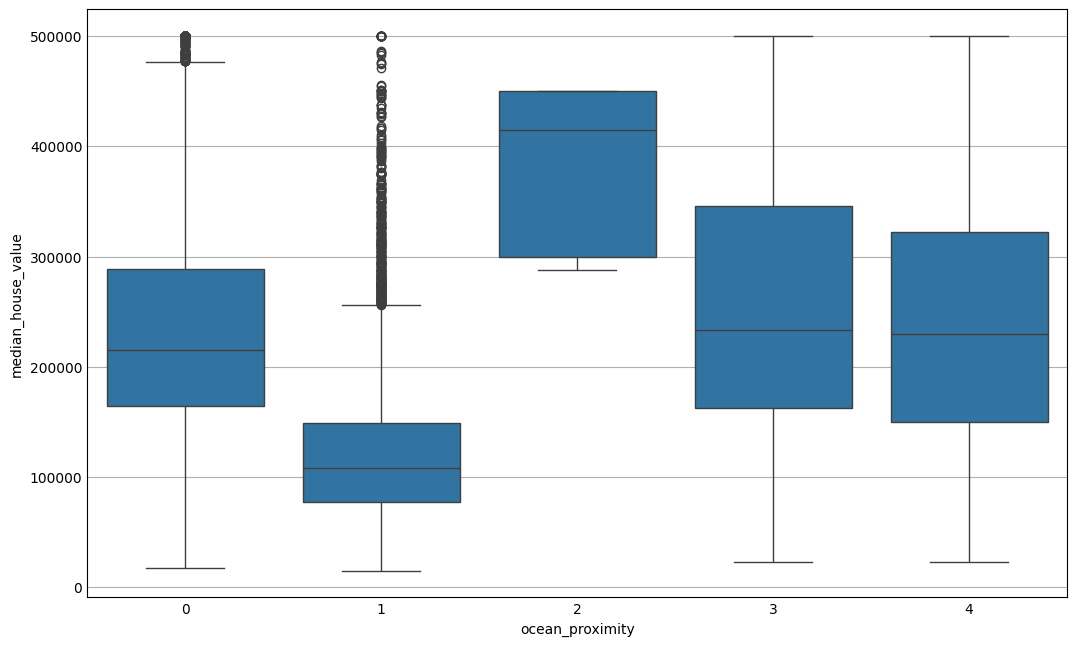

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [41]:
plt.figure(figsize=(10, 6))

sns.boxplot(y='median_house_value',x='ocean_proximity',data=data_new)

plt.show()
threshold = 500000
for i in data_new["ocean_proximity"]:
    premium_houses = data_new[(data_new['median_house_value'] > threshold) & (data_new['ocean_proximity'] == 'NEAR BAY')]

premium_houses


QN 12 

C:\Users\aaksh\AppData\Local\Temp\ipykernel_22696\1092315891.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], ax=axes[0], shade=True)


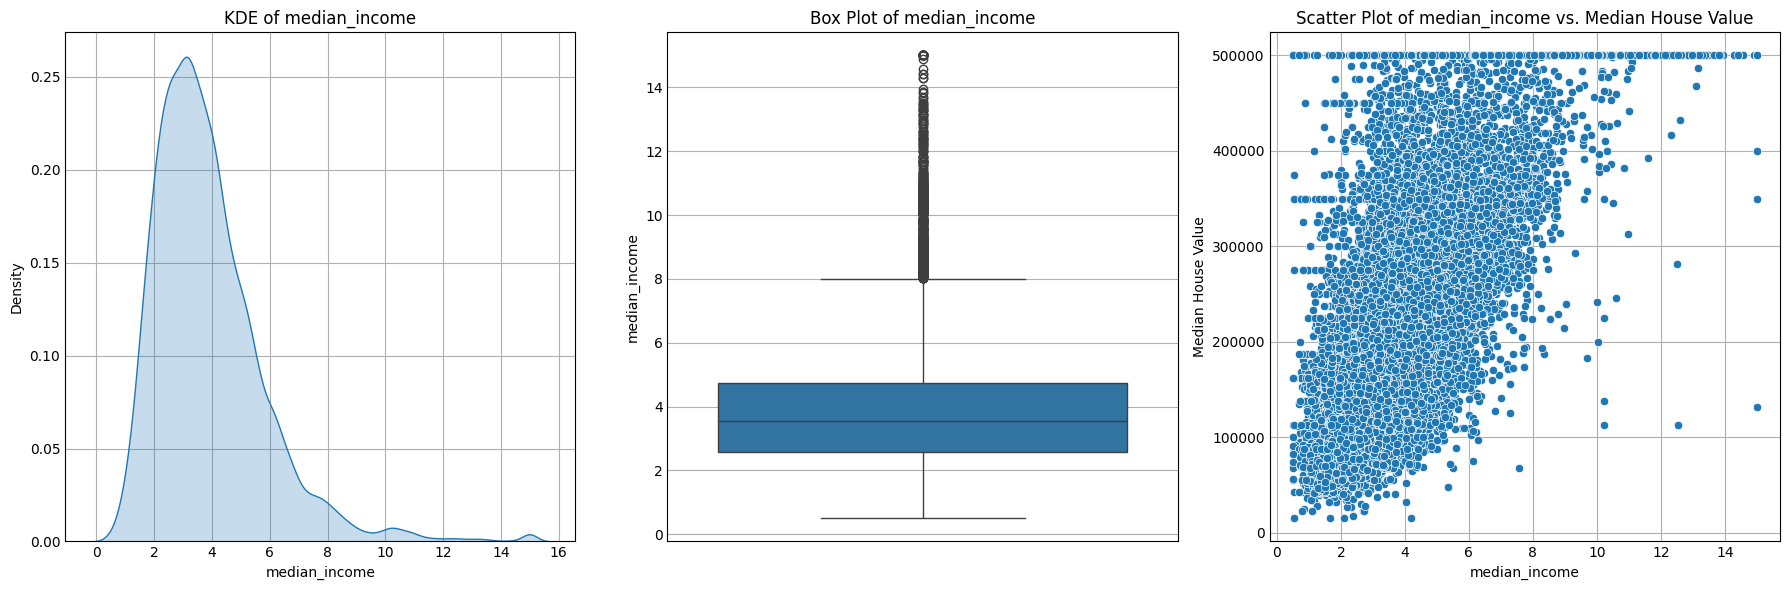

In [42]:
def visualize_column_distribution(df, column):

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.kdeplot(df[column], ax=axes[0], shade=True)
    axes[0].set_title(f'KDE of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')
 
    sns.boxplot(y=df[column], ax=axes[1])
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel('')
    axes[1].set_ylabel(column)

    sns.scatterplot(x=df[column], y=df['median_house_value'], ax=axes[2])
    axes[2].set_title(f'Scatter Plot of {column} vs. Median House Value')
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Median House Value')

    plt.tight_layout()
    

    plt.show()

visualize_column_distribution(data_new, 'median_income')

QN 13 

Total number of outliers in median_house_value: 1383


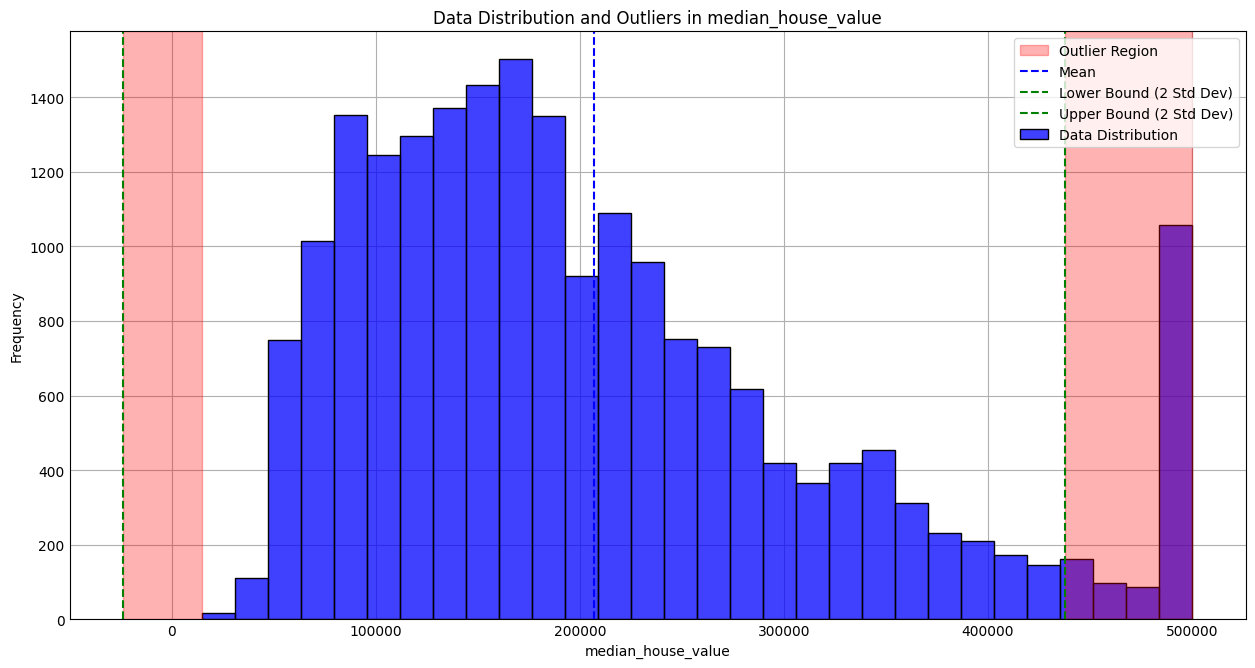

In [43]:
def identify_and_visualize_outliers(df, column):
    
    mean = df[column].mean()
    std_dev = df[column].std()

    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    num_outliers = outliers.shape[0]
    

    print(f'Total number of outliers in {column}: {num_outliers}')
    

    plt.figure(figsize=(12, 6))
    

    sns.histplot(df[column], kde=False, bins=30, color='blue', label='Data Distribution')

    plt.axvspan(df[column].min(), lower_bound, color='red', alpha=0.3, label='Outlier Region')
    plt.axvspan(upper_bound, df[column].max(), color='red', alpha=0.3)
    
    plt.axvline(mean, color='blue', linestyle='--', label='Mean')
    plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (2 Std Dev)')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound (2 Std Dev)')
    

    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Data Distribution and Outliers in {column}')
    plt.legend()
    

    plt.show()

identify_and_visualize_outliers(data_new, 'median_house_value')


QN 14 

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer


df_encoded = data_new.copy()
# Assuming df_encoded is your DataFrame with numerical features
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns



# Apply StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Compare the resulting ranges
print("StandardScaler Ranges:")
print(df_standard_scaled.describe().loc[['min', 'max']])

print("\nMinMaxScaler Ranges:")
print(df_minmax_scaled.describe().loc[['min', 'max']])


robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Apply QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')
df_quantile_scaled = pd.DataFrame(quantile_transformer.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Apply PowerTransformer
power_transformer = PowerTransformer()
df_power_scaled = pd.DataFrame(power_transformer.fit_transform(df_encoded[numerical_features]), columns=numerical_features)

# Compare the resulting ranges for additional scalers
print("\nRobustScaler Ranges:")
print(df_robust_scaled.describe().loc[['min', 'max']])

print("\nQuantileTransformer Ranges:")
print(df_quantile_scaled.describe().loc[['min', 'max']])

print("\nPowerTransformer Ranges:")
print(df_power_scaled.describe().loc[['min', 'max']])

StandardScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min  -2.385992 -1.447568           -2.196180    -1.207283       -1.277688   
max   2.625280  2.958068            1.856182    16.815580       14.087789   

     population  households  median_income  median_house_value  
min   -1.256123   -1.303984      -1.774299           -1.662641  
max   30.250330   14.601520       5.858286            2.540411  

MinMaxScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
min        0.0       0.0                 0.0          0.0             0.0   
max        1.0       1.0                 1.0          1.0             1.0   

     population  households  median_income  median_house_value  
min         0.0         0.0            0.0                 0.0  
max         1.0         1.0            1.0                 1.0  

RobustScaler Ranges:
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
mi